In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image

import os

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
import cv2

In [3]:
current_dir=os.getcwd()
training_dataset_dir = os.path.join(current_dir, 'dataset')

letters = [
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
        'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N','O', 'P', 'Q', 'R', 'S', 'T',
        'U', 'V', 'W', 'X', 'Y', 'Z'
    ]
RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

In [4]:
npaFlattenedImages =  np.empty((0, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))
trainImage = []
intClassifications = []
for each_letter in letters:
    x=0
    path = os.path.join(training_dataset_dir, each_letter)
    for files in os.listdir(path):
        if files.endswith('.png'):
            x+=1
    for each in range(x):
        #training_data[1] is for 10X20 training data images
        img_details = cv2.imread(training_dataset_dir+'/'+each_letter+'/'+each_letter+'_'+str(each)+'.png')
        imgROIResized = cv2.resize(img_details, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
        imgGray = cv2.cvtColor(imgROIResized, cv2.COLOR_BGR2GRAY)          # get grayscale image
        imgBlurred = cv2.GaussianBlur(imgGray, (5,5), 0)                        # blur

                                                            # filter image from grayscale to black and white
        imgThresh = cv2.adaptiveThreshold(imgBlurred,                           # input image
                                          255,                                  # make pixels that pass the threshold full white
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,       # use gaussian rather than mean, seems to give better results
                                          cv2.THRESH_BINARY_INV,                # invert so foreground will be white, background will be black
                                          11,                                   # size of a pixel neighborhood used to calculate threshold value
                                          2)   
        trainImage.append(imgThresh)
        intClassifications.append(each_letter)

In [11]:
print(intClassifications[0])
#print(trainImage[0])

0


In [22]:
#train_x = trainImage.reshape(1836,784)
Y = np.array(intClassifications)
X = np.array(trainImage)
print(X)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0 255 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0 255 ...   0   0   0]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255   0   0]
  [255 255 255 ... 255   0   0]
  [  0   0 255 ... 255   0  

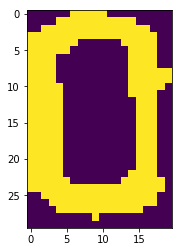

In [14]:
img = trainImage[0]
plt.imshow(img)
plt.show()

In [29]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = tf.nn.softmax))

In [30]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [31]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(X,Y,batch_size=32,epochs=10,verbose=1)

ValueError: Error when checking input: expected conv2d_9_input to have 4 dimensions, but got array with shape (1842, 30, 20)